## MNIST (Modified National Institute of Standards and Technology) - база данных образцов рукописного написания цифр

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

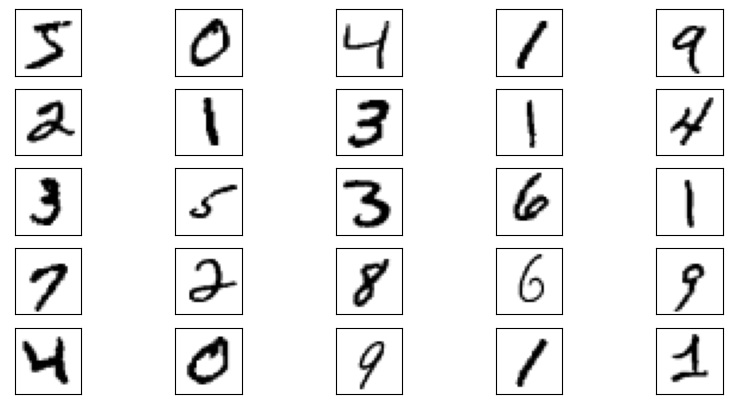

In [4]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

# для softmax - преобразование выходных значений в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

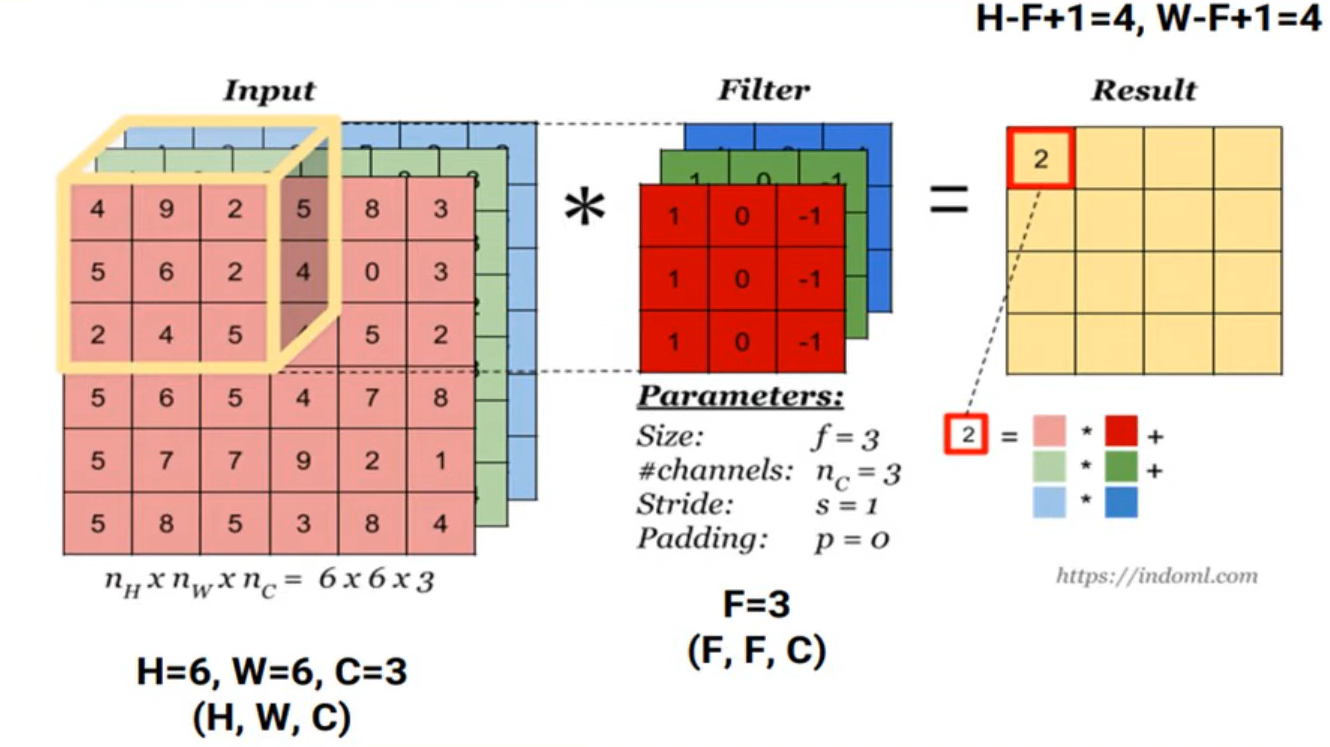

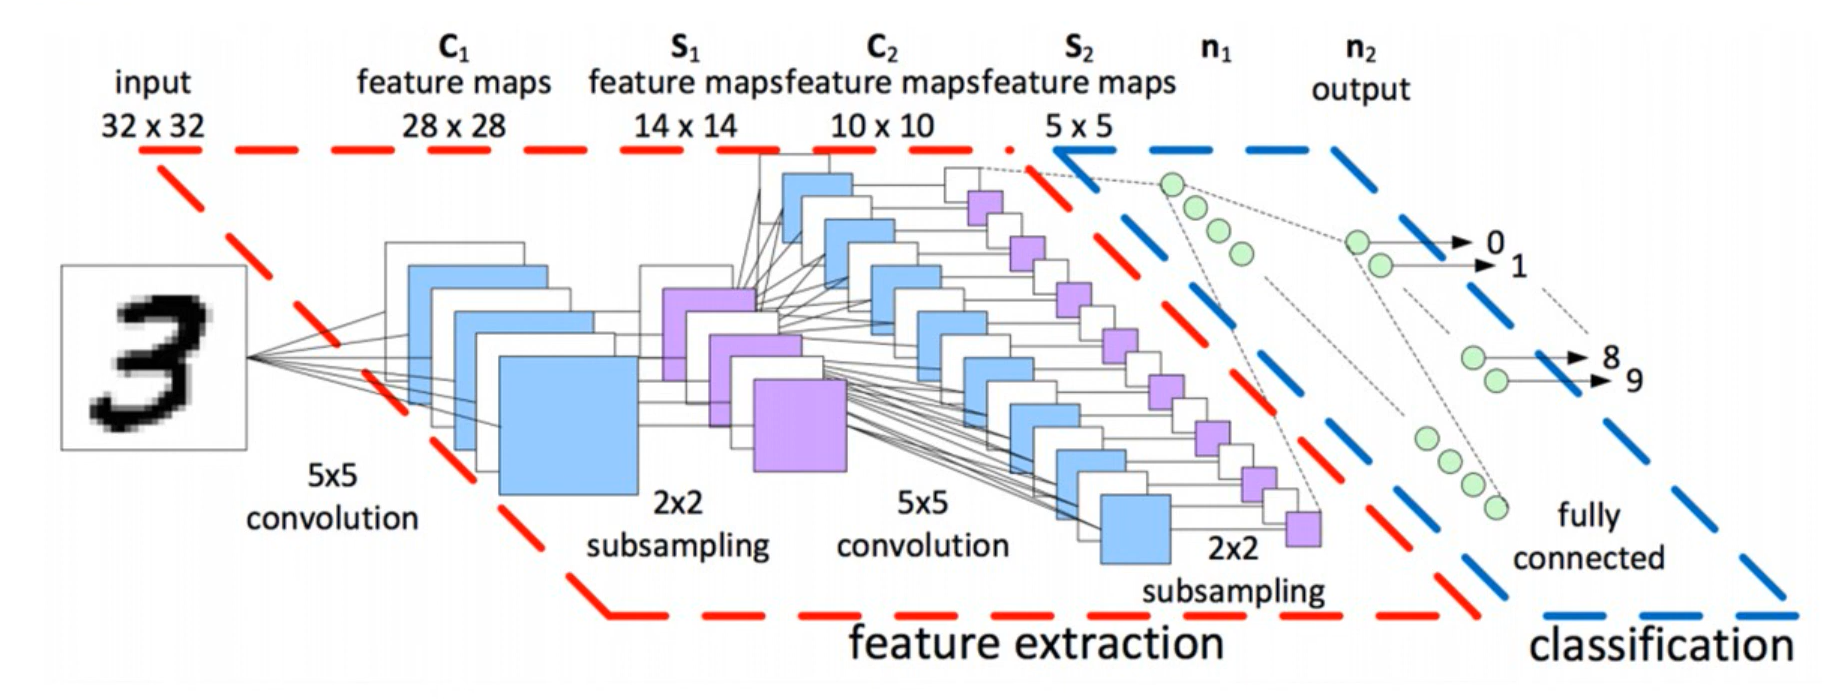

In [5]:
array_3 = np.array([[[[1,2],[3,4],[5,6]]],
                   [[[7,8],[9,8],[7,6]]],
                   [[[5,4],[3,2],[1,0]]]])

array_3.shape

# NumPy array
# (num_imges, num_channels, rows, cols)

# Tensor
# (num_imges, rows, cols, num_channels)

(3, 1, 3, 2)

In [6]:
# ч/б изображение - 1 канал, поэтому добавим еще одну ось
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [7]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2), # padding = 'valid'
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5


1500/1500 [==============================] - 9s 6ms/step - loss: 0.1402 - accuracy: 0.9571 - val_loss: 0.0626 - val_accuracy: 0.9812
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0480 - val_accuracy: 0.9870
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0455 - val_accuracy: 0.9857
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0406 - val_accuracy: 0.9891
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0412 - val_accuracy: 0.9887


In [9]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9902


[0.029908081516623497, 0.9901999831199646]

(28, 28, 1)
1/1 [==============================] - 0s 55ms/step
[[9.3940877e-10 4.7782560e-15 1.4041924e-15 1.6432318e-17 1.2470737e-09
  6.4482740e-13 1.0000000e+00 3.1753849e-17 1.6067104e-13 2.5273186e-14]]
Распознанная цифра: 6


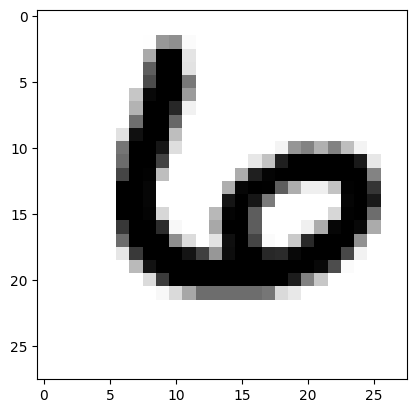

In [10]:
n = 665
# создание трехмерного тензора
x = np.expand_dims(x_test[n], axis=0)
print(x_test[n].shape)
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

## Собственная реализация

In [11]:
%run -m CNN
%run -m Layers

In [14]:
from tensorflow import keras
from keras.utils import to_categorical

def preprocess_data(x, y, limit):
    index = []
    for i in range(10):
        index.append(np.where(y == i)[0][:limit])
    all_indices = np.hstack(index)
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(len(y), 10, 1)
    return x, y

# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 20)

print(x_train.shape)

(60000, 28, 28)
(1000, 1, 28, 28)


In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1000, 1, 28, 28), (1000, 10, 1), (200, 1, 28, 28), (200, 10, 1))

Epoch 1/20 - loss: 0.6399
Epoch 2/20 - loss: 0.4015
Epoch 3/20 - loss: 0.3517
Epoch 4/20 - loss: 0.3277
Epoch 5/20 - loss: 0.3113
Epoch 6/20 - loss: 0.2962
Epoch 7/20 - loss: 0.2837
Epoch 8/20 - loss: 0.2768
Epoch 9/20 - loss: 0.2730
Epoch 10/20 - loss: 0.2694
Epoch 11/20 - loss: 0.2652
Epoch 12/20 - loss: 0.2616
Epoch 13/20 - loss: 0.2577
Epoch 14/20 - loss: 0.2551
Epoch 15/20 - loss: 0.2504
Epoch 16/20 - loss: 0.2460
Epoch 17/20 - loss: 0.2424
Epoch 18/20 - loss: 0.2390
Epoch 19/20 - loss: 0.2343
Epoch 20/20 - loss: 0.2312


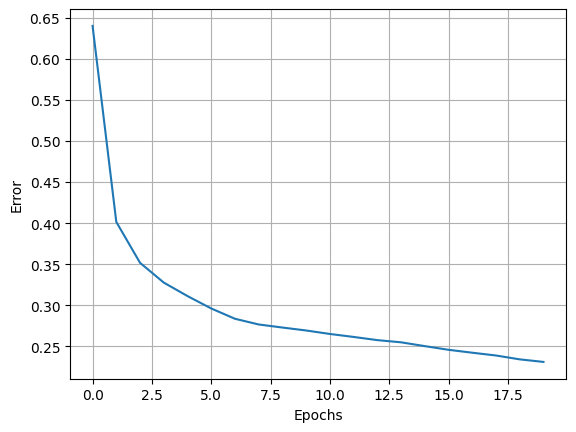

In [18]:
# neural network
# network = [
#     Conv2D(input_shape=(1, 28, 28), kernel_size=3, depth=5, activation='relu'),
#     Flatten(input_shape=(5, 26, 26), output_shape=(5*26*26, 1)),
#     Dense(input_shape=5*26*26, output_shape=100, activation='sigmoid'),
#     Dense(input_shape=100, output_shape=10, activation='tanh'),
# ]

network = [
    Conv2D(kernel_size=3, depth=5, activation='relu'),
    Flatten(),
    Dense(100, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
]

cnn = CNN((1, 28, 28), network, 'BinaryCrossEntropy')
cnn.fit(x_train, y_train, 20, 0.01)
cnn.error_plot

[[0.01406509]
 [0.00260074]
 [0.00653639]
 [0.10821388]
 [0.01759914]
 [0.02826997]
 [0.04243555]
 [0.07504029]
 [0.02329022]
 [0.05374589]]
Распознанная цифра: 3


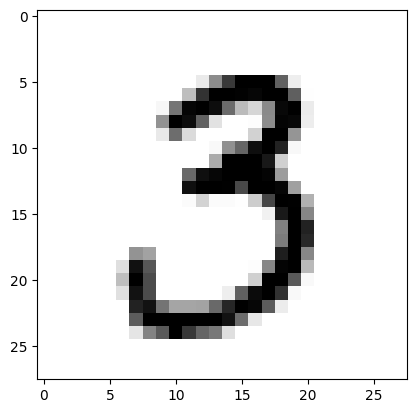

In [22]:
n = 100
res = cnn.predict(x_test[n])
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(np.reshape(x_test[n], (28, 28, 1)), cmap=plt.cm.binary)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

y_true = []
y_predi = []
for xx, yy in zip(x_test, y_test):
    y_pred = np.argmax(cnn.predict(xx))
    y_predi.append(y_pred)
    y_true.append(np.argmax(yy))

print('Accuracy:', accuracy_score(y_predi, y_true))

Accuracy: 0.455
